In [1]:
%run ../../functions/graphing_func

In [35]:
def plot_ratio(ell,Dl1,Dl2,title=None,fp=None,yscale="linear"): ##averaged over nrlz
    plt.figure()
    plt.title(title)
    plt.yscale(yscale)
    for i in range (Dl.shape[1]):
        plt.plot(ell,np.mean(Dl1[1:,i,:],axis=1)/np.mean(Dl2[1:,i,:],axis=1))
    #plt.savefig(fp)

In [2]:
def plot_loop(ell,Dl,title=None,fp=None,yscale="linear"): ##averaged over nrlz
    plt.figure()
    plt.title(title)
    plt.yscale(yscale)
    for i in range (Dl.shape[1]):
        plt.plot(ell,np.mean(Dl[:,i,:],axis=1))
    #plt.savefig(fp)

In [3]:
ell = np.arange(1,801,10)

In [15]:
##CNN estimator
bpwf_EE = np.load("bpwf_Nmodel_001_EE.npz")
bpwf_BB = np.load("bpwf_Nmodel_001_BB.npz")

Dl_BB_E = bpwf_EE["arr_2"]
Dl_BB_B = bpwf_BB["arr_2"]

Text(0.5, 1.0, 'CNN Filtered BB Spectrum from E-modes')

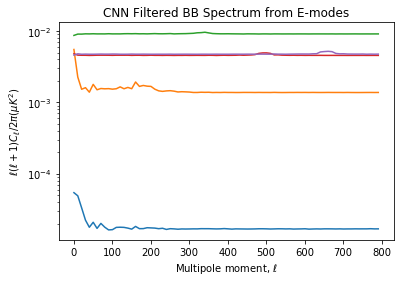

In [47]:
plt.plot(ell,np.mean(Dl_BB_E[:,0:19:4,:],axis=2),label="ell")
plt.yscale('log')
plt.xlabel('Multipole moment, $\ell$')
plt.ylabel('$\ell (\ell+1) C_\ell / 2 \pi(\mu K^2)$')
plt.title("CNN Filtered BB Spectrum from E-modes")
#plt.savefig("../../capstone_image/CNN_bpwf_E")

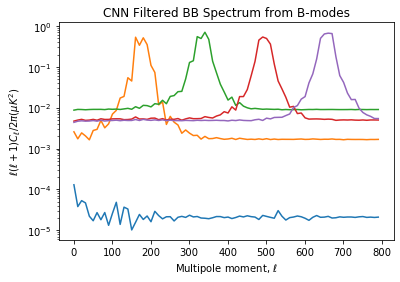

In [45]:
plt.plot(ell,Dl_BB_B[:,0:19:4,0],label="ell")
plt.yscale('log')
plt.xlabel('Multipole moment, $\ell$')
plt.ylabel('$\ell (\ell+1) C_\ell / 2 \pi(\mu K^2)$')
plt.title("CNN Filtered BB Spectrum from B-modes")
plt.savefig("../../capstone_image/CNN_bpwf_B")

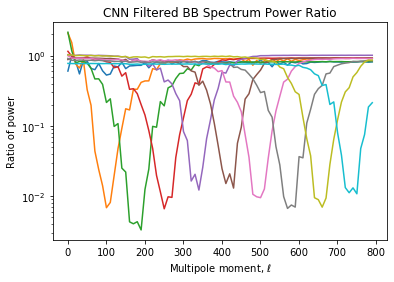

In [61]:
plt.plot(ell,np.mean(Dl_BB_E[:,0:19:2,:],axis=2)/np.mean(Dl_BB_B[:,0:19:2,:],axis=2),label="ell")
plt.yscale('log')
plt.xlabel('Multipole moment, $\ell$')
plt.ylabel('Ratio of power')
plt.title("CNN Filtered BB Spectrum Power Ratio")
plt.savefig("../../capstone_image/CNN_ratio")

In [7]:
##vanilla estimator (masking QU maps and calculating power spectra, no filters beyond this)
bpwf_EE_base = np.load("bpwf_baseline_001_EE.npz")
bpwf_BB_base = np.load("bpwf_baseline_001_BB.npz")

Dl_BB_E_base = bpwf_EE_base["arr_2"]
Dl_BB_B_base = bpwf_BB_base["arr_2"]

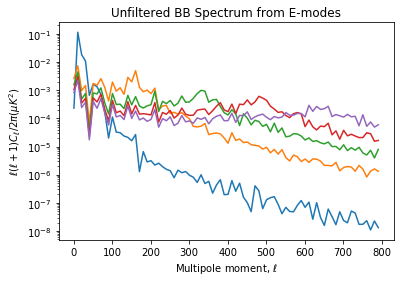

In [42]:
plt.plot(ell,Dl_BB_E_base[:,0:19:4,0])
plt.title("Unfiltered BB Spectrum from E-modes")
plt.yscale('log')
plt.xlabel('Multipole moment, $\ell$')
plt.ylabel('$\ell (\ell+1) C_\ell / 2 \pi(\mu K^2)$')
plt.savefig("../../capstone_image/vanilla_bpwf_E")

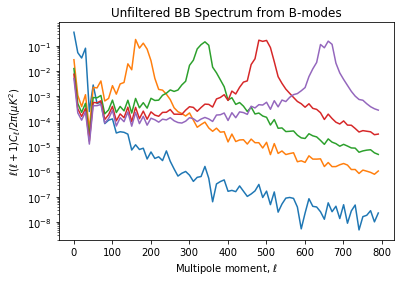

In [43]:
plt.plot(ell,Dl_BB_B_base[:,0:19:4,0])
plt.title("Unfiltered BB Spectrum from B-modes")
plt.yscale('log')
plt.xlabel('Multipole moment, $\ell$')
plt.ylabel('$\ell (\ell+1) C_\ell / 2 \pi(\mu K^2)$')
plt.savefig("../../capstone_image/vanilla_bpwf_B")

Text(0.5, 1.0, 'Vanilla Estimator Power Ratio')

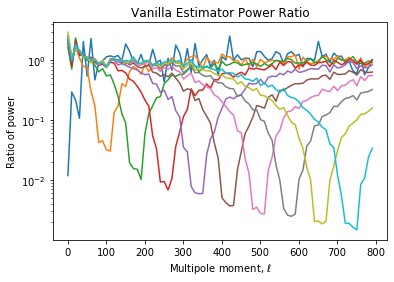

In [59]:
plt.plot(ell,np.mean(Dl_BB_E_base[:,0:19:2,:],axis=2)/np.mean(Dl_BB_B_base[:,0:19:2,:],axis=2))
plt.yscale('log')
plt.xlabel('Multipole moment, $\ell$')
plt.ylabel('Ratio of power')
plt.title("Vanilla Estimator Power Ratio")
plt.savefig("../../capstone_image/vanilla_ratio")

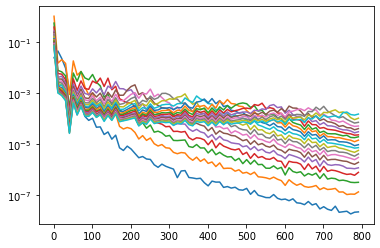

In [8]:
plot_loop(ell,Dl_BB_E_base,yscale="log")

In [18]:
##unmasked estimator (compute power spectra directly from QU maps)
bpwf_EE_unfilter = np.load("bpwf_nofilter_001_EE.npz")
bpwf_BB_unfilter = np.load("bpwf_nofilter_001_BB.npz")

Dl_BB_E_unfilter = bpwf_EE_unfilter["arr_2"]
Dl_BB_B_unfilter = bpwf_BB_unfilter["arr_2"]

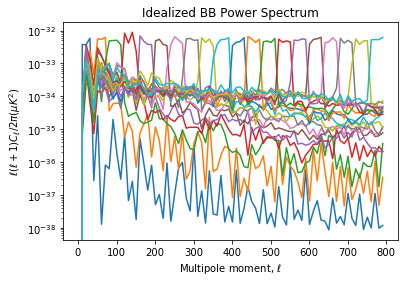

In [20]:
plot_loop(ell,Dl_BB_E_unfilter,yscale="log",title="Idealized BB Power Spectrum");
plt.xlabel('Multipole moment, $\ell$')
plt.ylabel('$\ell (\ell+1) C_\ell / 2 \pi(\mu K^2)$')
plt.savefig("../../capstone_image/bpwf_ideal")

In [93]:
mask=np.load("../original_data/mask_v0.npy")
noise=(np.random.randn(512,512)/(np.sqrt(mask+10**-4)))*5

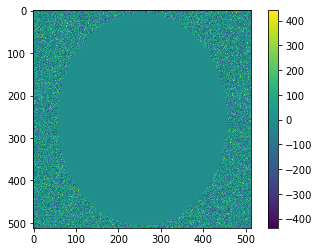

In [85]:
plt.imshow(noise)
plt.colorbar()

In [58]:
def masking(CMB_maps,mask,noise):
    masked_maps = np.transpose(np.zeros(CMB_maps.shape),(3,1,2,0))
    for i in range(CMB_maps.shape[-1]):
        masked_maps[i,:,:,:]=np.transpose((CMB_maps[:,:,:,i]*mask)+noise,(1,2,0))
    return masked_maps

In [62]:
maps=np.load("../original_data/CMB_maps.npz")["arr_0"]

In [94]:
complete=masking(maps,mask>0,noise)

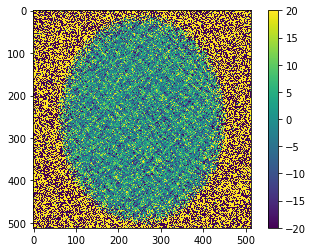

In [95]:
plt.imshow(complete[0,:,:,2],vmin=-20,vmax=20)
#plt.imshow(maps[2,:,:,0])
plt.colorbar()